In [1]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns

In [7]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [8]:
infiles

('Z:/temp/VideoOutputCamera 0-03022023-111235_posthoc-predictions.npy',
 'Z:/temp/VideoOutputCamera 0-03022023-130237_posthoc-predictions.npy')

In [9]:
predictions = []
for f in range(len(infiles)):
    predictions.append(np.load(infiles[f]))

In [21]:
#(totaltime of ms1, totaltime of ms2) ... in tenths of seconds 
(len(predictions[0]), len(predictions[1]))

(29581, 16657)

In [10]:
# for f in range(len(infiles)):
data_dict = {'animal':np.hstack(([np.repeat(infiles[f].rpartition('_post')[0].rpartition('/')[2].rpartition(' 0-')[2], len(predictions[f])) 
                                  for f in range(len(infiles))])),
             'behavior': np.hstack([predictions[f] for f in range(len(predictions))])}
data_dict
                                                                    
df = pd.DataFrame(data = data_dict)
df

,animal,behavior
0,03022023-111235,5.0
1,03022023-111235,5.0
2,03022023-111235,5.0
3,03022023-111235,5.0
4,03022023-111235,5.0
...,...,...
46233,03022023-130237,5.0
46234,03022023-130237,5.0
46235,03022023-130237,5.0
46236,03022023-130237,5.0


<AxesSubplot: xlabel='behavior', ylabel='Count'>

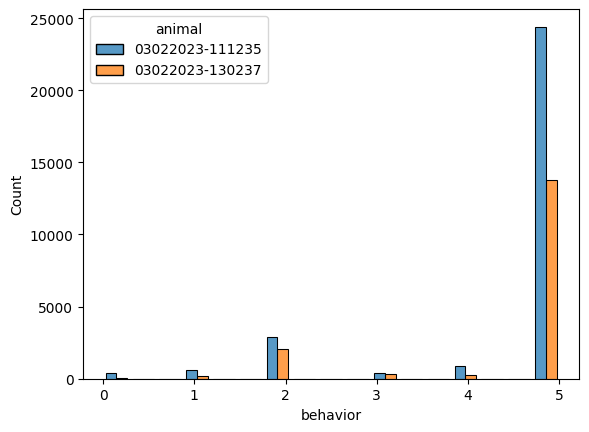

In [11]:
sns.histplot(data=df, x="behavior", hue="animal", 
             multiple="dodge", shrink=.8)

In [41]:
#behavior plot over time for ms1 only (49 min video)

ms1 = predictions[0]
data_dict2 = {'time': np.hstack([f for f in range(len(predictions[0]))]), 
              'locomotion count': np.hstack([predictions[0][f] for f in range(len(ms1))])}


df2 = pd.DataFrame(data = data_dict2)
df3 = df2[df2.behavior == 2]
df2, df3

        

(        time  behavior
 0          0       5.0
 1          1       5.0
 2          2       5.0
 3          3       5.0
 4          4       5.0
 ...      ...       ...
 29576  29576       5.0
 29577  29577       5.0
 29578  29578       5.0
 29579  29579       5.0
 29580  29580       5.0
 
 [29581 rows x 2 columns],
         time  behavior
 16        16       2.0
 17        17       2.0
 18        18       2.0
 19        19       2.0
 20        20       2.0
 ...      ...       ...
 29568  29568       2.0
 29569  29569       2.0
 29570  29570       2.0
 29571  29571       2.0
 29573  29573       2.0
 
 [2926 rows x 2 columns])

<AxesSubplot: xlabel='time', ylabel='Count'>

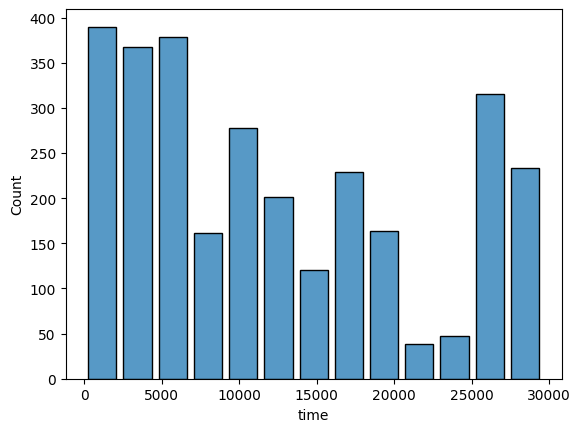

In [61]:
sns.histplot(data=df3, x="time",
             stat='count',
             multiple="dodge", shrink=.8, bins=13) #3000 tenths of a second = 5 mins

#There doesn't seem to be a great difference in locomotion count that relates to interjection of stim.
#The first bin represents the first 5 minutes of pre-stim, which oddly shows the highest count of locomotion bouts. 
